# Example 2 - Folded Layer

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 865 m wide (W-E extent) and 866 m high (N-S extent).
<img src='../../data/examples/example2/task2.png' width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load Data

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example2/task2.png')
interfaces = gpd.read_file('../../../gemgis/data/examples/example2/interfaces2_lines.shp')
orientations = gpd.read_file('../../../gemgis/data/examples/example2/orientations2.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example2/extent2.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example2/topo2.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example2/customsections2.shp')

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\rasterio\__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


# Inspect Data

In [3]:
interfaces.head()

,id,formation,Z,geometry
0,None,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ..."
1,None,Layer1,50,"LINESTRING (628.941 863.195, 637.925 850.294, ..."
2,None,Layer1,100,"LINESTRING (534.604 865.153, 549.463 845.687, ..."
3,None,Layer1,150,"LINESTRING (458.590 864.955, 473.370 845.597, ..."
4,None,Layer1,100,"LINESTRING (2.577 102.527, 17.435 83.097, 25.0..."


In [4]:
orientations.head()

,id,Z,dip,azimuth,formation,geometry
0,None,350,31,233,Layer1,POINT (319.826 436.957)
1,None,300,31,233,Layer1,POINT (276.736 359.570)
2,None,250,31,233,Layer1,POINT (237.163 271.630)
3,None,200,27,233,Layer1,POINT (189.675 194.243)
4,None,150,25,233,Layer1,POINT (117.565 124.770)


In [5]:
extent.head()

,id,geometry
0,None,"POLYGON ((0.000 866.000, 865.000 866.000, 865...."


In [6]:
topo.head()

,id,Z,geometry
0,None,350,"LINESTRING (1.385 62.877, 136.138 47.987, 292...."
1,None,300,"LINESTRING (1.571 124.111, 129.996 110.524, 22..."
2,None,250,"LINESTRING (0.082 198.374, 59.641 178.273, 118..."
3,None,50,"LINESTRING (863.690 271.706, 829.815 271.334, ..."
4,None,100,"LINESTRING (864.062 307.070, 828.326 304.092, ..."


In [7]:
custom_section.head()

,id,section,geometry
0,None,Section1,"LINESTRING (1.593 388.445, 852.428 865.929)"


# Create GemPy Data Class

In [8]:
geo_data = gg.GemPyData(model_name='Model2', 
                        crs='EPSG:4326')

In [9]:
vars(geo_data)

{'model_name': 'Model2',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

# Set Extent

In [10]:
geo_data.set_extent(gdf=extent, minz=-50, maxz=400)
geo_data.extent

[0.0, 865.0, 0.0, 866.0, -50, 400]

# Set Resolution

In [11]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Attribute Data to Data Class

In [12]:
geo_data.set_extent(0.0, 865.0, 0.0, 866.0, -50, 400)
geo_data.extent

[0.0, 865.0, 0.0, 866.0, -50, 400]

In [13]:
geo_data.raw_i = interfaces
geo_data.raw_i

,id,formation,Z,geometry
0,None,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ..."
1,None,Layer1,50,"LINESTRING (628.941 863.195, 637.925 850.294, ..."
2,None,Layer1,100,"LINESTRING (534.604 865.153, 549.463 845.687, ..."
3,None,Layer1,150,"LINESTRING (458.590 864.955, 473.370 845.597, ..."
4,None,Layer1,100,"LINESTRING (2.577 102.527, 17.435 83.097, 25.0..."
5,None,Layer1,150,"LINESTRING (3.720 276.250, 18.959 255.931, 69...."
6,None,Layer1,200,"LINESTRING (1.942 442.607, 16.673 422.161, 23...."
7,None,Layer1,250,"LINESTRING (1.307 583.693, 16.038 564.136, 33...."
8,None,Layer1,300,"LINESTRING (1.815 721.604, 17.562 701.286, 24...."
9,None,Layer1,350,"LINESTRING (1.466 864.659, 16.324 845.102, 22...."


In [14]:
geo_data.raw_o = orientations
geo_data.raw_o

,id,Z,dip,azimuth,formation,geometry
0,None,350,31,233,Layer1,POINT (319.826 436.957)
1,None,300,31,233,Layer1,POINT (276.736 359.570)
2,None,250,31,233,Layer1,POINT (237.163 271.630)
3,None,200,27,233,Layer1,POINT (189.675 194.243)
4,None,150,25,233,Layer1,POINT (117.565 124.770)
5,None,350,33,53,Layer1,POINT (421.837 531.052)
6,None,300,39,53,Layer1,POINT (500.103 556.555)
7,None,250,46,53,Layer1,POINT (530.882 620.751)
8,None,200,50,53,Layer1,POINT (567.817 650.651)
9,None,150,39,53,Layer1,POINT (594.199 683.188)


In [15]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[112, 153, 180, ..., 181, 246, 249],
       [ 63,  94, 188, ..., 142, 225, 249],
       [ 69,  70, 139, ..., 147, 229, 254],
       ...,
       [214, 198, 246, ..., 131,  89, 177],
       [204, 160, 201, ..., 158,  86, 185],
       [240, 216, 220, ..., 201, 186, 225]], dtype=uint8)

In [16]:
geo_data.contours = topo
geo_data.contours

,id,Z,geometry
0,None,350,"LINESTRING (1.385 62.877, 136.138 47.987, 292...."
1,None,300,"LINESTRING (1.571 124.111, 129.996 110.524, 22..."
2,None,250,"LINESTRING (0.082 198.374, 59.641 178.273, 118..."
3,None,50,"LINESTRING (863.690 271.706, 829.815 271.334, ..."
4,None,100,"LINESTRING (864.062 307.070, 828.326 304.092, ..."
5,None,150,"LINESTRING (863.759 401.035, 852.280 378.582, ..."
6,None,200,"LINESTRING (862.409 482.068, 833.034 470.250, ..."
7,None,250,"LINESTRING (864.097 636.030, 851.267 592.137, ..."
8,None,300,"LINESTRING (860.045 721.452, 849.916 715.037, ..."
9,None,350,"LINESTRING (862.746 805.524, 836.748 783.240, ..."


# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

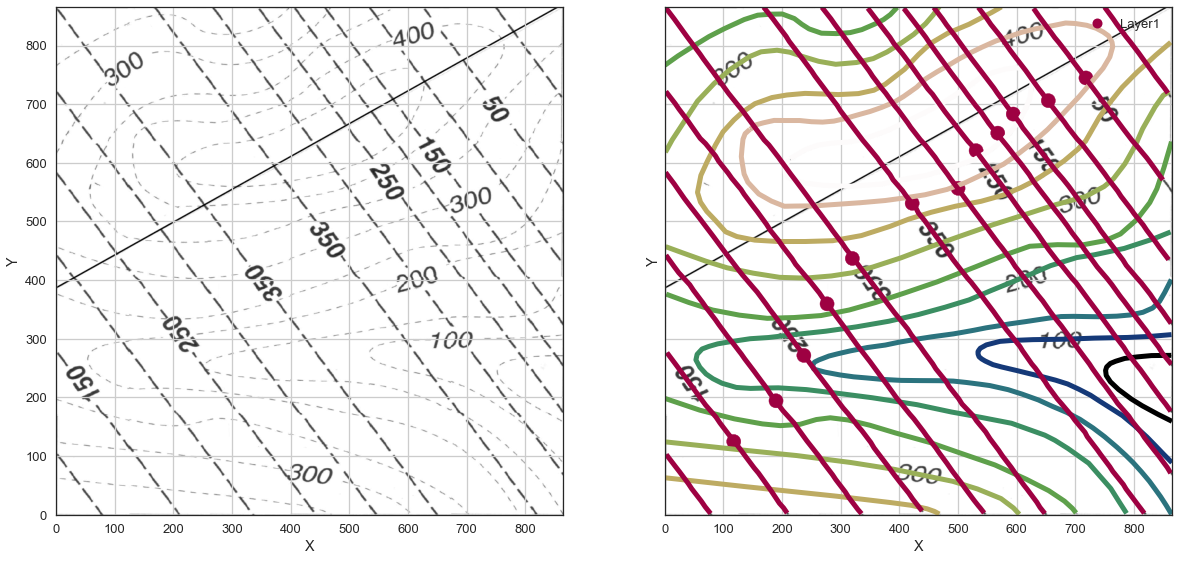

In [17]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_contours=True,
                           show_customsections=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral'
                           )

# Interpolate Topography

In [18]:
dem = gg.vector.interpolate_raster(topo, method='rbf')
geo_data.raw_dem = dem
geo_data.raw_dem

array([[240.44305532, 240.3533452 , 240.26529712, ..., 360.06230619,
        359.76289529, 359.46346152],
       [240.45275522, 240.36385251, 240.27663029, ..., 359.98508309,
        359.6833359 , 359.38156858],
       [240.46392464, 240.37584045, 240.28945558, ..., 359.90575305,
        359.60167206, 359.29757301],
       ...,
       [375.44007438, 375.40730712, 375.3737062 , ..., 150.30268463,
        149.73838827, 149.24734253],
       [375.82182976, 375.78933294, 375.75603738, ..., 150.71949949,
        150.13832737, 149.64002732],
       [376.20250341, 376.17026864, 376.13726861, ..., 151.2072866 ,
        150.62305109, 150.12421308]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

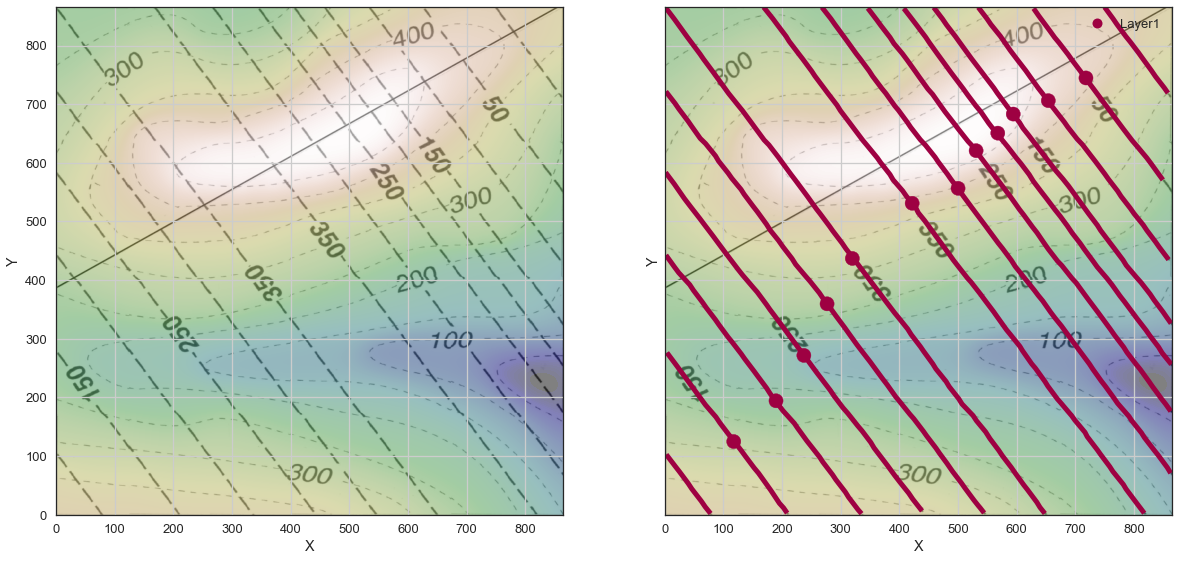

In [19]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )

# Save Topography as Raster

In [20]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example2/topo.tif',np.flipud(dem), crs='EPSG:4326', extent=[0,870,0,870])#geo_data.extent)

In [21]:
topography = rasterio.open('../../../gemgis/data/examples/example2/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example2/topo.tif' mode='r'>

# Set Interfaces

In [22]:
interfaces_coords = gg.vector.extract_xy(interfaces, reset_index=False)
interfaces_coords.head()

,formation,Z,geometry,points,X,Y
0,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ...","(750.0003891306708, 865.4411014639877)",750.00,865.44
0,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ...","(764.513747612086, 845.6292152830081)",764.51,845.63
0,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ...","(770.9641291593817, 836.1840137316109)",770.96,836.18
0,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ...","(785.9382291798895, 815.9113860115388)",785.94,815.91
0,Layer1,0,"LINESTRING (750.000 865.441, 764.514 845.629, ...","(793.7708353444629, 806.2358136905951)",793.77,806.24


In [23]:
geo_data.to_gempy_df(interfaces_coords.sample(n=50), 'interfaces')
geo_data.interfaces.head()

,index,X,Y,Z,formation
0,10,809.00,13.95,350,Layer1
1,10,486.82,441.65,350,Layer1
2,7,125.76,417.34,250,Layer1
3,8,223.16,426.86,300,Layer1
4,12,477.81,687.13,250,Layer1


# Set Orientations

In [24]:
orientations_coords = gg.vector.extract_xy(orientations)
orientations_coords

,Z,dip,azimuth,formation,geometry,X,Y
0,350,31.00,233.00,Layer1,POINT (319.826 436.957),319.83,436.96
1,300,31.00,233.00,Layer1,POINT (276.736 359.570),276.74,359.57
2,250,31.00,233.00,Layer1,POINT (237.163 271.630),237.16,271.63
3,200,27.00,233.00,Layer1,POINT (189.675 194.243),189.68,194.24
4,150,25.00,233.00,Layer1,POINT (117.565 124.770),117.56,124.77
5,350,33.00,53.00,Layer1,POINT (421.837 531.052),421.84,531.05
6,300,39.00,53.00,Layer1,POINT (500.103 556.555),500.10,556.55
7,250,46.00,53.00,Layer1,POINT (530.882 620.751),530.88,620.75
8,200,50.00,53.00,Layer1,POINT (567.817 650.651),567.82,650.65
9,150,39.00,53.00,Layer1,POINT (594.199 683.188),594.20,683.19


In [25]:
geo_data.to_gempy_df(orientations_coords, 'orientations')
geo_data.orientations.head()

,index,X,Y,Z,formation,dip,azimuth,polarity
0,0,319.83,436.96,350,Layer1,31.00,233.00,1
1,1,276.74,359.57,300,Layer1,31.00,233.00,1
2,2,237.16,271.63,250,Layer1,31.00,233.00,1
3,3,189.68,194.24,200,Layer1,27.00,233.00,1
4,4,117.56,124.77,150,Layer1,25.00,233.00,1


# Check Data Class

In [26]:
vars(geo_data)

{'model_name': 'Model2',
 'crs': 'EPSG:4326',
 'extent': [0.0, 865.0, 0.0, 866.0, -50, 400],
 'resolution': [50, 50, 50],
 'interfaces':     index      X      Y    Z formation
 0      10 809.00  13.95  350    Layer1
 1      10 486.82 441.65  350    Layer1
 2       7 125.76 417.34  250    Layer1
 3       8 223.16 426.86  300    Layer1
 4      12 477.81 687.13  250    Layer1
 5      11 665.37 335.49  300    Layer1
 6       1 694.83 774.73   50    Layer1
 7       7  33.31 539.25  250    Layer1
 8      10 786.65  43.67  350    Layer1
 9       8 537.62  11.86  300    Layer1
 10     12 669.82 432.38  250    Layer1
 11      2 750.00 581.45  100    Layer1
 12      3 855.82 336.70  150    Layer1
 13      1 716.25 745.94   50    Layer1
 14     11 398.44 689.67  300    Layer1
 15      8 247.80 397.91  300    Layer1
 16     12 604.80 520.52  250    Layer1
 17      3 849.60 345.71  150    Layer1
 18      9 479.58 227.29  350    Layer1
 19      2 572.27 815.97  100    Layer1
 20     10 432.47 514.55

# Add Section Dict

In [27]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([1.593210345965275, 388.4453900184363],
  [852.4277356922321, 865.9286460336549],
  [100, 80])}

# Add Surface Colors

In [28]:
geo_data.surface_colors = {'Layer1':'#b35a2a', 'basement': '#525252'}
geo_data.surface_colors

{'Layer1': '#b35a2a', 'basement': '#525252'}

# Add Stack

In [29]:
geo_data.stack = {"Strat_Series": ('Layer1')}
geo_data.stack

{'Strat_Series': 'Layer1'}

# Add DEM

In [30]:
geo_data.dem = '../../../gemgis/data/examples/example2/topo2.tif'
geo_data.dem

'../../../gemgis/data/examples/example2/topo2.tif'

# Visualize Data Set

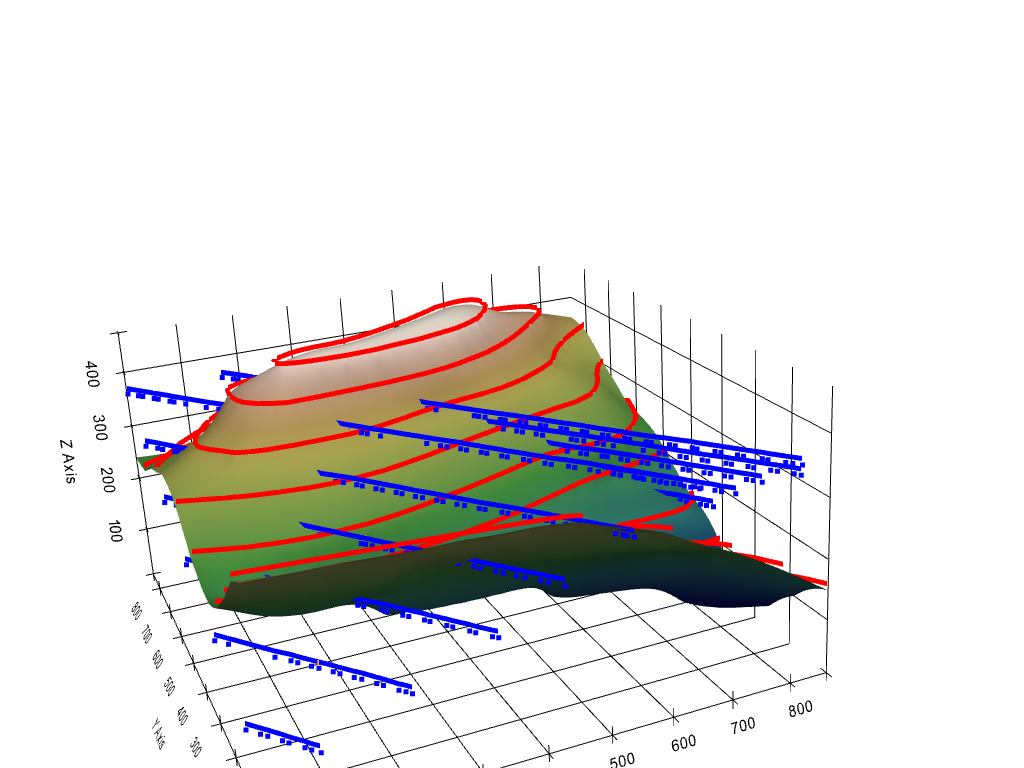

In [31]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(np.flipud(dem), p, cmap = 'gist_earth', extent=geo_data.extent[:4])
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [32]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\test_gempy\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [33]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model2  2020-10-29 19:58

In [34]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model2  2020-10-29 19:58

In [35]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Layer1,Default series,1,#015482,1


In [36]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Layer1,Strat_Series,1,#015482,1
1,basement,Strat_Series,2,#9f0052,2


In [37]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

In [38]:
geo_model.set_topography(source='gdal', filepath='../../../gemgis/data/examples/example2/topo.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  8.65      ,   8.66      , -45.5       ],
       [  8.65      ,   8.66      , -36.5       ],
       [  8.65      ,   8.66      , -27.5       ],
       ...,
       [864.49767712, 863.48839907, 360.5065918 ],
       [864.49767712, 864.49303944, 360.58773804],
       [864.49767712, 865.49767981, 360.66662598]])

In [39]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
Section1,"[1.593210345965275, 388.4453900184363]","[852.4277356922321, 865.9286460336549]","[100, 80]",975.66


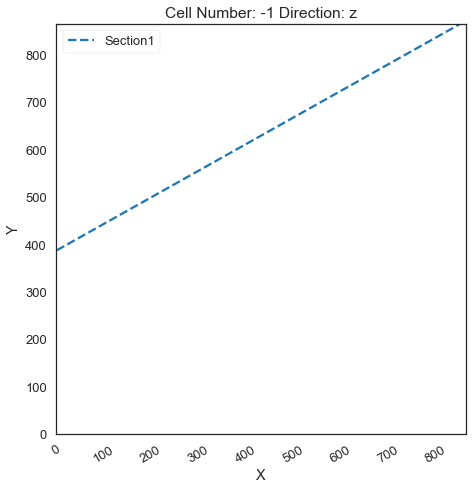

In [40]:
gp.plot.plot_section_traces(geo_model)

In [41]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1304.10
$C_o$           40492.40
drift equations      [3]


In [42]:
sol = gp.compute_model(geo_model)

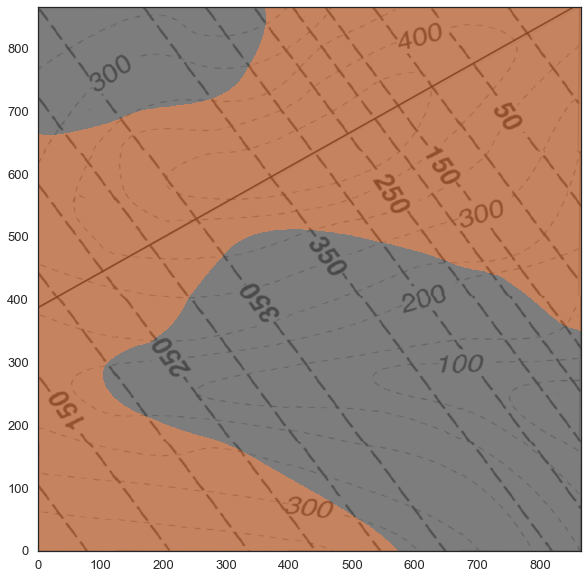

In [43]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#b35a2a', '#525252']
plt.figure(figsize=(10,10))
plt.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
gmap = np.rot90(geolmap,1)
plt.imshow(gmap, extent=geo_data.extent[:4], alpha=0.75, cmap=ListedColormap(cols))

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


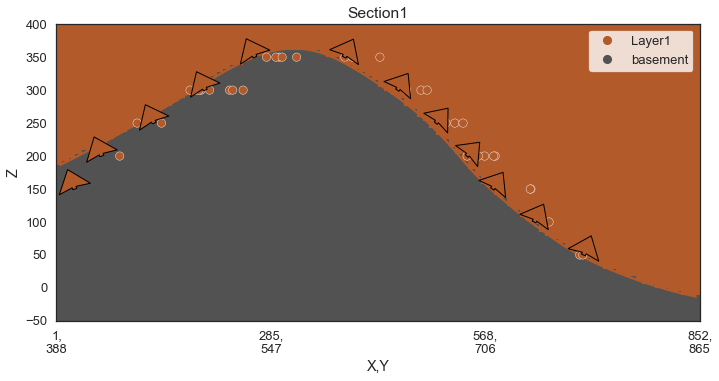

In [44]:
gp.plot_2d(geo_model, section_names=['Section1'])

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


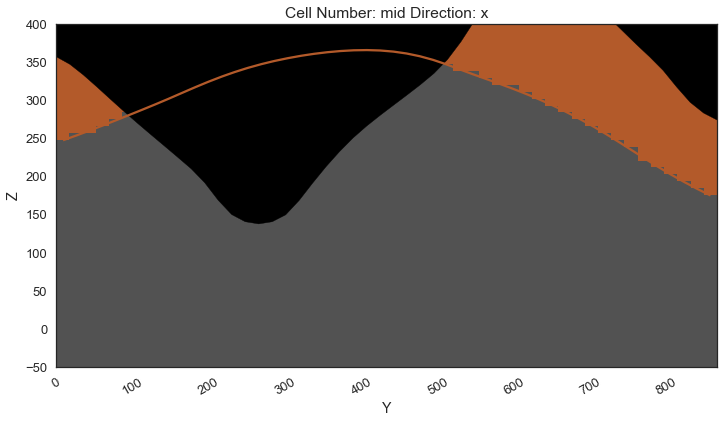

In [45]:
gp.plot_2d(geo_model, direction='x', show_topography=True, show_data=False)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


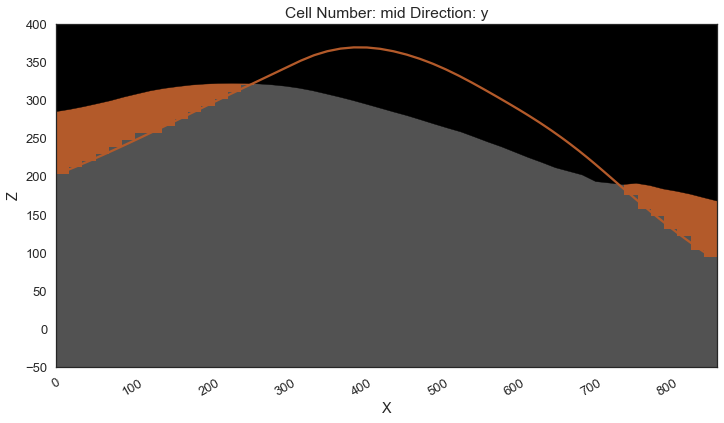

In [46]:
gp.plot_2d(geo_model, direction='y', show_topography=True, show_data=False)

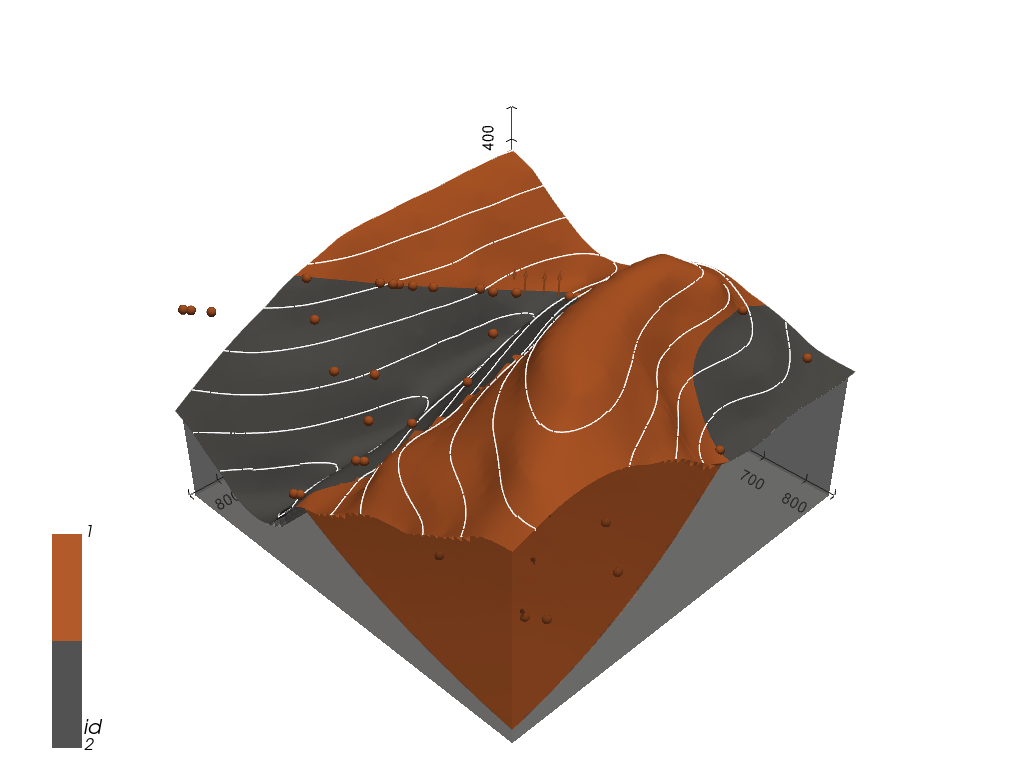

In [47]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [48]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

,formation,geometry
0,basement,"POLYGON ((573.150 1.049, 573.645 0.502, 574.15..."
1,basement,"POLYGON ((8.539 662.556, 9.544 662.476, 10.549..."
2,Layer1,"POLYGON ((1.507 0.502, 2.512 0.502, 3.516 0.50..."


## Plot Polygons

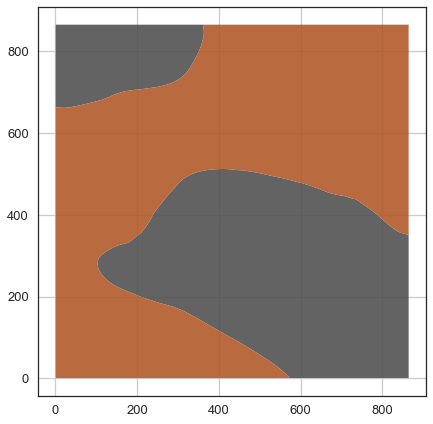

In [49]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9, aspect='equal')
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [50]:
gdf.to_file('../../../gemgis/data/examples/example2/liths.shp')

<img src='../../../gemgis/data/Images/output_gemgis.png' width="800">

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [51]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example2/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                  values
range            450.22
$C_o$           4826.19
drift equations     [3]


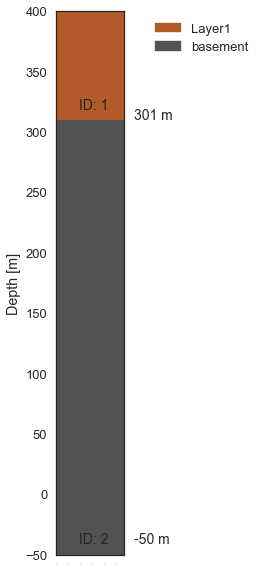

In [52]:
sol = gg.post.extract_borehole(geo_model, geo_data, [600,400])

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

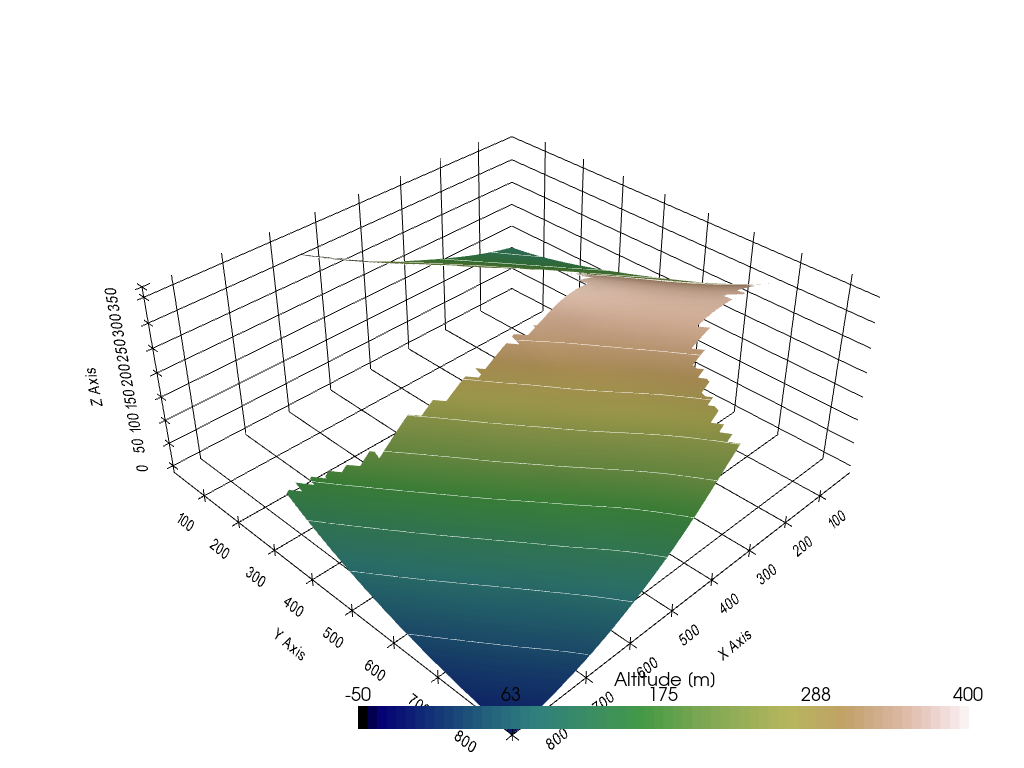

In [53]:
gg.visualization.plot_depth_map(geo_model, 'Layer1', clim=[-50, 400], notebook=True)